# DEEP & WIDE RECOMMENDATION

## NOTEBOOK 1 - DATA PREPROCESSING

**NI-MVI SEMESTRAL WORK (ZS 2021/22)**

*Juraj Kmec*

---

Import libraries.

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearnex import patch_sklearn

patch_sklearn()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

sns.set()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Read user database.

In [3]:
users_df = pd.read_csv('data/users.csv', sep='|', header=None)
users_df.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_df['user_id'] -= 1  # Make IDs start at 0.
users_df

user_id  age gender     occupation zip_code
0          0   24      M     technician    85711
1          1   53      F          other    94043
2          2   23      M         writer    32067
3          3   24      M     technician    43537
4          4   33      F          other    15213
..       ...  ...    ...            ...      ...
938      938   26      F        student    33319
939      939   32      M  administrator    02215
940      940   20      M        student    97229
941      941   48      F      librarian    78209
942      942   22      M        student    77841

[943 rows x 5 columns]

Reade item database.

In [4]:
items_df = pd.read_csv('data/items.csv', sep='|',
                       header=None, encoding='latin-1')
items_df.columns = [
    'item_id', 'movie_title', 'release_date', 'video_release_date',
    'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
    'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Thriller', 'War', 'Western'
]
items_df['item_id'] -= 1  # Make IDs start at 0.
items_df

item_id                                movie_title release_date  \
0           0                           Toy Story (1995)  01-Jan-1995   
1           1                           GoldenEye (1995)  01-Jan-1995   
2           2                          Four Rooms (1995)  01-Jan-1995   
3           3                          Get Shorty (1995)  01-Jan-1995   
4           4                             Copycat (1995)  01-Jan-1995   
...       ...                                        ...          ...   
1677     1677                          Mat' i syn (1997)  06-Feb-1998   
1678     1678                           B. Monkey (1998)  06-Feb-1998   
1679     1679                       Sliding Doors (1998)  01-Jan-1998   
1680     1680                        You So Crazy (1994)  01-Jan-1994   
1681     1681  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video_release_date                                           IMDb_URL  \
0                    NaN  http://us.imdb.com/M/title-exact?Toy%20Story%2...   
1                    NaN  http://us.imdb.com/M/title-exact?GoldenEye%20(...   
2                    NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%...   
3                    NaN  http://us.imdb.com/M/title-exact?Get%20Shorty%...   
4                    NaN  http://us.imdb.com/M/title-exact?Copycat%20(1995)   
...                  ...                                                ...   
1677                 NaN  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...   
1678                 NaN  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...   
1679                 NaN      http://us.imdb.com/Title?Sliding+Doors+(1998)   
1680                 NaN  http://us.imdb.com/M/title-exact?You%20So%20Cr...   
1681                 NaN  http://us.imdb.com/M/title-exact?Schrei%20aus%...   

      unknown  Action  Adventure  Animation  Children's  ...  Fantasy  \
0           0       0          0          1           1  ...        0   
1           0       1          1          0           0  ...        0   
2           0       0          0          0           0  ...        0   
3           0       1          0          0           0  ...        0   
4           0       0          0          0           0  ...        0   
...       ...     ...        ...        ...         ...  ...      ...   
1677        0       0          0          0           0  ...        0   
1678        0       0          0          0           0  ...        0   
1679        0       0          0          0           0  ...        0   
1680        0       0          0          0           0  ...        0   
1681        0       0          0          0           0  ...        0   

      Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0             0       0        0        0        0       0         0    0   
1             0       0        0        0        0       0         1    0   
2             0       0        0        0        0       0         1    0   
3             0       0        0        0        0       0         0    0   
4             0       0        0        0        0       0         1    0   
...         ...     ...      ...      ...      ...     ...       ...  ...   
1677          0       0        0        0        0       0         0    0   
1678          0       0        0        0        1       0         1    0   
1679          0       0        0        0        1       0         0    0   
1680          0       0        0        0        0       0         0    0   
1681          0       0        0        0        0       0         0    0   

      Western  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1677        0  
1678        0  
1679        0  
1680        0  
1681        0  

[1682 rows x 24 columns]

Read ratings.

In [5]:
ratings_df = pd.read_csv('data/ratings.csv', sep='\t', header=None)
ratings_df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df['user_id'] -= 1  # Make IDs match the DataFrame above.
ratings_df['item_id'] -= 1  # Make IDs match the DataFrame above.
ratings_df

user_id  item_id  rating  timestamp
0          195      241       3  881250949
1          185      301       3  891717742
2           21      376       1  878887116
3          243       50       2  880606923
4          165      345       1  886397596
...        ...      ...     ...        ...
99995      879      475       3  880175444
99996      715      203       5  879795543
99997      275     1089       1  874795795
99998       12      224       2  882399156
99999       11      202       3  879959583

[100000 rows x 4 columns]

Histogram of ratings.

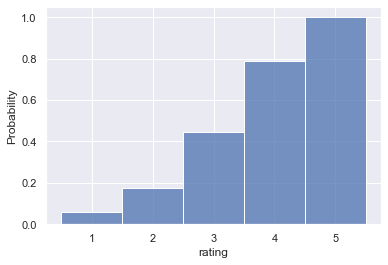

In [6]:
sns.histplot(ratings_df['rating'], discrete=True, stat='probability')
plt.show()
sns.histplot(ratings_df['rating'], discrete=True, cumulative=True, stat='probability')
plt.show()

Perform database-style join to get a full dataframe.

In [7]:
data_df_wide = ratings_df.merge(users_df, on='user_id')
data_df_wide = data_df_wide.merge(items_df, on='item_id')
print('Columns:')
data_df_wide.columns

Columns:


Index(['user_id', 'item_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip_code', 'movie_title', 'release_date',
       'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

Clean-up columns and binarize the target.

In [8]:
features_df = data_df_wide.drop(
    columns=['timestamp', 'movie_title', 'video_release_date', 'IMDb_URL'])
features_df['rating'] = features_df['rating'].map(
    {1: 0, 2: 0, 3: 0, 4: 1, 5: 1})  # 1 to 3 stars = Did not like. 4 or 5 stars = Liked.
features_df = features_df.rename(columns={'rating': 'target'})
features_df

user_id  item_id  target  age gender  occupation zip_code release_date  \
0          195      241       0   49      M      writer    55105  24-Jan-1997   
1          304      241       1   23      M  programmer    94086  24-Jan-1997   
2            5      241       1   42      M   executive    98101  24-Jan-1997   
3          233      241       1   60      M     retired    94702  24-Jan-1997   
4           62      241       0   31      M   marketing    75240  24-Jan-1997   
...        ...      ...     ...  ...    ...         ...      ...          ...   
99995      862     1678       0   17      M     student    60089  06-Feb-1998   
99996      862     1677       0   17      M     student    60089  06-Feb-1998   
99997      862     1679       0   17      M     student    60089  01-Jan-1998   
99998      895     1680       0   28      M      writer    91505  01-Jan-1994   
99999      915     1681       0   27      M    engineer    N2L5N  08-Mar-1996   

       unknown  Action  ...  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0            0       0  ...        0          0       0        0        0   
1            0       0  ...        0          0       0        0        0   
2            0       0  ...        0          0       0        0        0   
3            0       0  ...        0          0       0        0        0   
4            0       0  ...        0          0       0        0        0   
...        ...     ...  ...      ...        ...     ...      ...      ...   
99995        0       0  ...        0          0       0        0        0   
99996        0       0  ...        0          0       0        0        0   
99997        0       0  ...        0          0       0        0        0   
99998        0       0  ...        0          0       0        0        0   
99999        0       0  ...        0          0       0        0        0   

       Romance  Sci-Fi  Thriller  War  Western  
0            0       0         0    0        0  
1            0       0         0    0        0  
2            0       0         0    0        0  
3            0       0         0    0        0  
4            0       0         0    0        0  
...        ...     ...       ...  ...      ...  
99995        1       0         1    0        0  
99996        0       0         0    0        0  
99997        1       0         0    0        0  
99998        0       0         0    0        0  
99999        0       0         0    0        0  

[100000 rows x 27 columns]

Convert dates from structured date to number of days.

In [9]:
features_df['release_date'] = (
    pd.to_datetime(features_df['release_date']) - pd.Timestamp("1970-01-01")
) // pd.Timedelta("1 day")
features_df['release_date']

0         9885.0
1         9885.0
2         9885.0
3         9885.0
4         9885.0
          ...   
99995    10263.0
99996    10263.0
99997    10227.0
99998     8766.0
99999     9563.0
Name: release_date, Length: 100000, dtype: float64

Save the full vocabulary of categorical features before splitting the dataset.

In [10]:
vocabulary = {}
categorical_features = ['item_id', 'gender', 'occupation', 'zip_code']
for feature in categorical_features:
    vocabulary[feature] = features_df[feature].unique().tolist()
with open('vocabulary.json', 'w') as file:
    json.dump(vocabulary, file, indent='\t')

Split the dataset to train, validation, and test datasets (Ratio 0.68 : 0.12 : 0.2).

In [11]:
train_df, test_df = train_test_split(
    features_df, test_size=0.2, shuffle=True)
train_df, val_df = train_test_split(
    train_df, test_size=0.15)

Get vocabularies of user and item IDs as plain list.

In [12]:
items_all = list(range(len(items_df)))
users_all = list(range(len(users_df)))

print(f'Number of items: {len(items_all)}')
print(f'Number of users: {len(users_all)}')

Number of items: 1682
Number of users: 943


For each row, create new columns representing the history of liked movies from the training dataset (i.e., the movies that the user reviewed positively).  
Computing this during runtime would be infeasible.

In [13]:
def get_train_item_mask(train_df):
    # Vector of item IDs to one-hot encoded matrix.
    encoder = OneHotEncoder(
        categories=[items_all], sparse=False, dtype=np.uint8)
    return encoder.fit_transform(train_df['item_id'].values.reshape(-1, 1))


def make_history_cols(train_df, val_df, test_df):
    n_items = len(items_all)

    train_res = np.zeros((len(train_df), n_items), dtype=np.int8)
    train_res = pd.DataFrame(
        train_res, index=train_df.index, columns=[f'liked_item_{i}' for i in items_all])
    val_res = np.zeros((len(val_df), n_items), dtype=np.int8)
    val_res = pd.DataFrame(
        val_res, index=val_df.index, columns=[f'liked_item_{i}' for i in items_all])
    test_res = np.zeros((len(test_df), n_items), dtype=np.int8)
    test_res = pd.DataFrame(
        test_res, index=test_df.index, columns=[f'liked_item_{i}' for i in items_all])

    for user in users_all:
        user_rows_train = train_df.reset_index()
        user_rows_train = user_rows_train[user_rows_train['user_id'] == user]
        positive_items = user_rows_train.loc[
            user_rows_train['target'] == 1, 'item_id']

        for in_df, res_df in zip([train_df, val_df, test_df], [train_res, val_res, test_res]):
            user_rows = in_df.reset_index()
            user_rows = user_rows[user_rows['user_id'] == user]
            res_df.iloc[user_rows.index, positive_items] = 1

    mask = get_train_item_mask(train_df)
    train_res -= mask
    train_res = train_res.replace({-1: 0})

    return [
        pd.concat([train_df, train_res], axis=1),
        pd.concat([val_df, val_res], axis=1),
        pd.concat([test_df, test_res], axis=1),
    ]


# Get the expanded DataFrames.
train_df, val_df, test_df = make_history_cols(
    train_df, val_df, test_df)


Save the resulting dataframes.

In [14]:
train_df = train_df.drop(columns=['user_id'])
train_df.to_csv('data/train.csv', index=False)

val_df = val_df.drop(columns=['user_id'])
val_df.to_csv('data/val.csv', index=False)

test_df = test_df.drop(columns=['user_id'])
test_df.to_csv('data/test.csv', index=False)